**THE SPARKS FOUNDATION**

**Task 2 : Prediction using Supervised ML**

**Problem : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

***Author: SRIYA JAISWAL***

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing the Dataset**

In [2]:
iris = pd.read_csv('Iris.csv')
print("Data Imported")

Data Imported


**Print first 5 rows of Dataset**

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Number of Rows and Columns**

In [4]:
iris.shape

(150, 6)

**Check Missing Values**

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Statistical Measure of the Dataset**

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Data Information**

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Pairplt to visualize the relationship between multiple variables**

<Figure size 432x288 with 0 Axes>

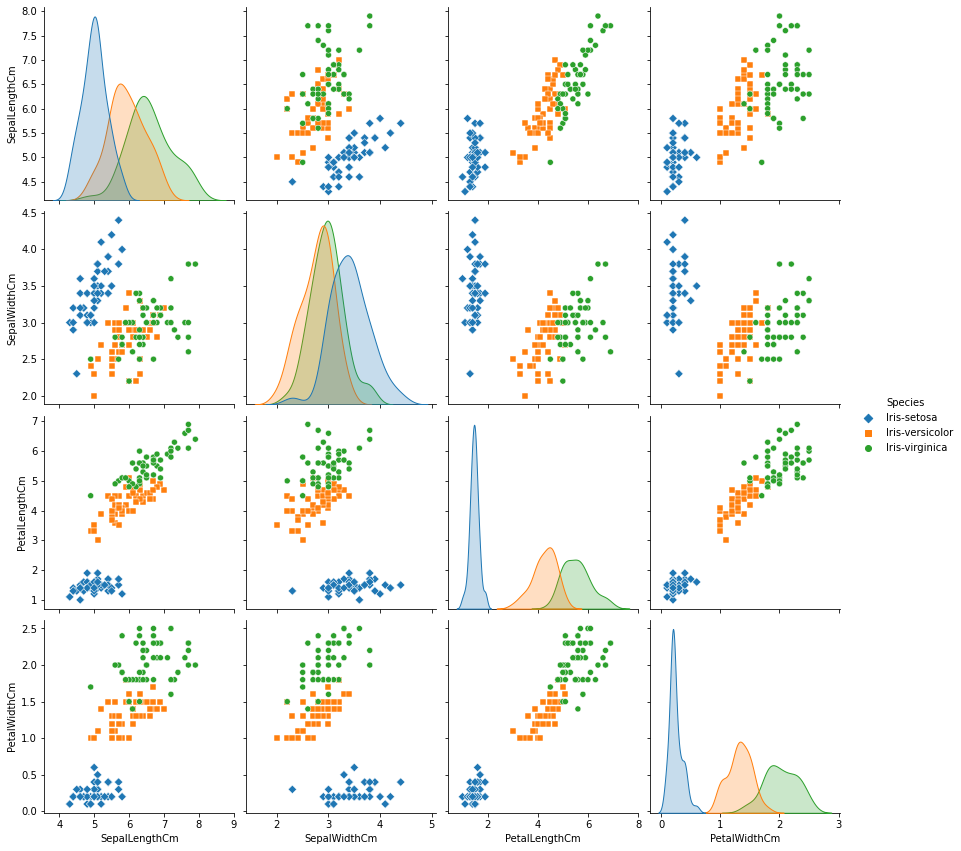

In [8]:
plt.figure()
sns.pairplot(iris.drop("Id", axis = 1), hue = 'Species', height = 3, markers = ["D", "s", "o"])
plt.show();

**Correlation Matrix**

In [9]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


**Constructing heatmap to understand the correlation**

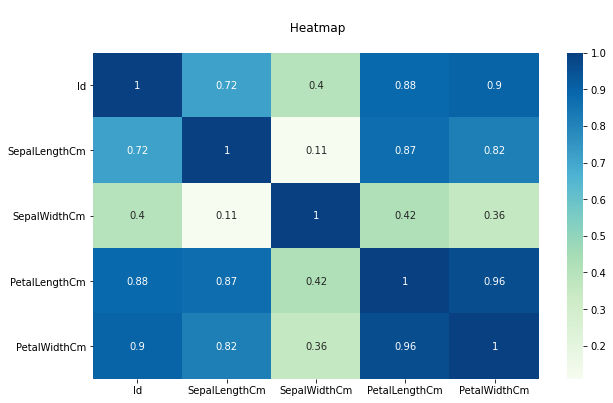

In [11]:
plt.figure(figsize= (10,6))
plt.title('\n Heatmap\n')
sns.heatmap(abs(iris.corr()), cmap='GnBu', annot=True);

**Importing LabelEncoder**

In [12]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:, 1:5].values
y = iris.iloc[:, 5].values

le = LabelEncoder()
y = le.fit_transform(y)

**To find the optimum number of clusters**

***We implement: THE ELBOW METHOD***

[The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters.]

In [13]:
from sklearn.cluster import KMeans
wcss= []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

**Plotting to Observe : The Elbow**

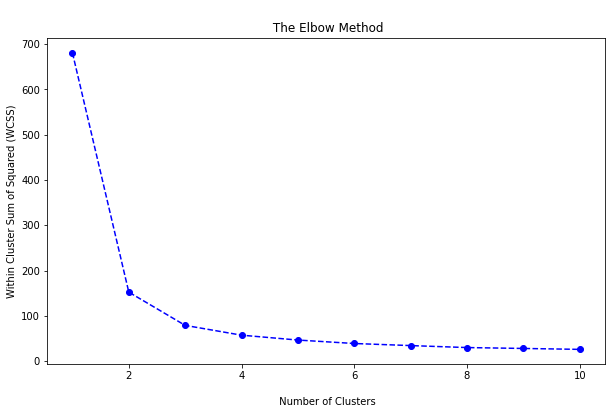

In [15]:
plt.figure(figsize= (10,6))
plt.plot(range(1, 11), wcss, "go--", color = 'blue')
plt.title('\n The Elbow Method')
plt.xlabel('\n Number of Clusters')
plt.ylabel('Within Cluster Sum of Squared (WCSS)')
plt.show();

**Applying K-means to the Dataset**

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)

y_kmeans = kmeans.fit_predict(X)

**Visualization of Clusters**

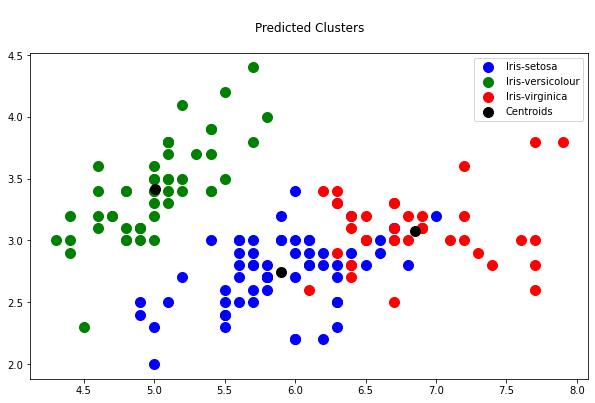

In [17]:
plt.figure(figsize=(10,6))
plt.title('\nPredicted Clusters\n')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')
plt.legend()

**Conclusion: We have visualized clusters from the given dataset, hence optimum number of clusters predicted is 3.**

**THANK YOU**


